# Predict Startup will succeed or fail

### Import the dataset

In [1]:
import pandas as pd
df_dictionary = pd.read_csv('E:/Insaid Project/aCQUIRE iNTERNSHIP/DataDictionary.csv')

In [2]:
import seaborn as sn
import matplotlib.pyplot as plt

In [3]:
df_traindata = pd.read_csv('E:/Insaid Project/aCQUIRE iNTERNSHIP/TrainData.csv')

In [4]:
df_testdata = pd.read_csv('E:/Insaid Project/aCQUIRE iNTERNSHIP/TestData.csv')

In [5]:
df_dictionary.head()

,Variables,Description,Scale
0,Dependent,"0- Company Failed, 1- Company is successful",Binary
1,Company_Location,Location of Headquarter of company,Nominal
2,Company_raising_fund,If company has been raising funds recently,Binary
3,Company_Industry_count,Number of Industry company is catering to,Continuous
4,Company_mobile_app,If company has mobile application,Binary


In [6]:
df_dictionary.describe()

,Variables,Description,Scale
count,50,50,50
unique,50,50,4
top,Founders_Domain_skills_score,Domain knowledge score of founders,Ordinal
freq,1,1,20


### Check the columns present in the Dictionary data

In [7]:
df_dictionary.columns

Index(['Variables', 'Description', 'Scale'], dtype='object')

In [8]:
df_dictionary.tail()

,Variables,Description,Scale
45,Company_Product_or_service,If company is product or service based,Nominal
46,Company_subscription_offering,If company is offering subscription,Nominal
47,Founder_highest_degree_type,Founder highest education type,Nominal
48,Company_difficulty_obtaining_workforce,level of difficulty in obtaining workforce,Ordinal
49,Company_Founder_Patent,If company or founders have patent,Nominal


In [9]:
df_traindata.head()

,CAX_ID,Dependent,Company_Location,Company_raising_fund,Company_Industry_count,Company_mobile_app,Company_investor_count_seed,Company_investor_count_Angel_VC,Company_cofounders_count,Company_advisors_count,...,Company_avg_investment_time,Company_crowdsourcing,Company_crowdfunding,Company_big_data,Company_analytics_score,Company_Product_or_service,Company_subscription_offering,Founder_highest_degree_type,Company_difficulty_obtaining_workforce,Company_Founder_Patent
0,Company2,1,USA,No,Few,Yes,5,0,2,0,...,9.000000,Yes,No,No,2,Product,No,Management,Medium,Yes
1,Company3,1,USA,No,Few,No,15,0,3,0,...,7.344444,No,No,No,1,Both,Yes,Science,Medium,Yes
2,Company5,1,USA,No,Few,No,7,0,1,1,...,9.822222,No,No,No,0,Product,No,Technology,Medium,Yes
3,Company6,1,USA,No,Few,No,2,0,4,0,...,9.322222,No,No,No,0,Service,No,Science,Medium,Yes
4,Company8,1,USA,No,Few,No,0,0,3,4,...,6.400000,No,No,No,2,Both,No,Management,Medium,No


### Check the columns present in the train data

In [10]:
df_traindata.columns

Index(['CAX_ID', 'Dependent', 'Company_Location', 'Company_raising_fund',
       'Company_Industry_count', 'Company_mobile_app',
       'Company_investor_count_seed', 'Company_investor_count_Angel_VC',
       'Company_cofounders_count', 'Company_advisors_count',
       'Company_senior_team_count', 'Company_top_Angel_VC_funding',
       'Company_repeat_investors_count', 'Founders_top_company_experience',
       'Founders_previous_company_employee_count',
       'Founders_startup_experience', 'Founders_big_5_experience',
       'Company_business_model', 'Founders_experience',
       'Founders_global_exposure', 'Founders_Industry_exposure',
       'Founder_education', 'Founder_university_quality',
       'Founders_Popularity', 'Founders_fortune1000_company_score',
       'Founders_profile_similarity', 'Founders_publications',
       'Founders_skills_score', 'Founders_Entrepreneurship_skills_score',
       'Founders_Operations_skills_score', 'Founders_Engineering_skills_score',
       'Fou

### Check the shape of Dataset

In [11]:
df_traindata.shape

(234, 51)

In [12]:
df_testdata.head()

,CAX_ID,Dependent,Company_Location,Company_raising_fund,Company_Industry_count,Company_mobile_app,Company_investor_count_seed,Company_investor_count_Angel_VC,Company_cofounders_count,Company_advisors_count,...,Company_avg_investment_time,Company_crowdsourcing,Company_crowdfunding,Company_big_data,Company_analytics_score,Company_Product_or_service,Company_subscription_offering,Founder_highest_degree_type,Company_difficulty_obtaining_workforce,Company_Founder_Patent
0,Company1,NaN,USA,No,single,No,2,0,1,2,...,11.560000,No,No,No,0,Service,Yes,Management,Low,No
1,Company4,NaN,USA,No,Few,No,6,0,2,0,...,8.700000,Yes,No,No,0,Product,Yes,Technology,Medium,Yes
2,Company7,NaN,USA,No,single,No,7,0,2,9,...,7.311111,No,No,No,1,Both,Yes,Technology,Medium,No
3,Company10,NaN,USA,No,Few,No,0,0,3,4,...,5.000000,No,No,No,1,Product,No,Science,High,No
4,Company12,NaN,USA,No,Few,No,0,1,0,1,...,3.850000,No,No,No,0,Product,No,Science,Medium,Yes


In [13]:
df_testdata['Dependent'] = df_testdata['Dependent'].fillna(0)

### Check the shape of test Data

In [14]:
df_testdata.shape

(80, 51)

### Combining the train and test dataset.

In [16]:
combine_data = pd.concat([df_traindata, df_testdata])

In [17]:
combine_data.head()

,CAX_ID,Dependent,Company_Location,Company_raising_fund,Company_Industry_count,Company_mobile_app,Company_investor_count_seed,Company_investor_count_Angel_VC,Company_cofounders_count,Company_advisors_count,...,Company_avg_investment_time,Company_crowdsourcing,Company_crowdfunding,Company_big_data,Company_analytics_score,Company_Product_or_service,Company_subscription_offering,Founder_highest_degree_type,Company_difficulty_obtaining_workforce,Company_Founder_Patent
0,Company2,1.0,USA,No,Few,Yes,5,0,2,0,...,9.000000,Yes,No,No,2,Product,No,Management,Medium,Yes
1,Company3,1.0,USA,No,Few,No,15,0,3,0,...,7.344444,No,No,No,1,Both,Yes,Science,Medium,Yes
2,Company5,1.0,USA,No,Few,No,7,0,1,1,...,9.822222,No,No,No,0,Product,No,Technology,Medium,Yes
3,Company6,1.0,USA,No,Few,No,2,0,4,0,...,9.322222,No,No,No,0,Service,No,Science,Medium,Yes
4,Company8,1.0,USA,No,Few,No,0,0,3,4,...,6.400000,No,No,No,2,Both,No,Management,Medium,No


In [18]:
combine_data.isnull().sum()

CAX_ID                                      0
Dependent                                   0
Company_Location                            0
Company_raising_fund                        0
Company_Industry_count                      0
Company_mobile_app                          0
Company_investor_count_seed                 0
Company_investor_count_Angel_VC             0
Company_cofounders_count                    0
Company_advisors_count                      0
Company_senior_team_count                   0
Company_top_Angel_VC_funding                0
Company_repeat_investors_count              0
Founders_top_company_experience             0
Founders_previous_company_employee_count    0
Founders_startup_experience                 0
Founders_big_5_experience                   0
Company_business_model                      0
Founders_experience                         0
Founders_global_exposure                    0
Founders_Industry_exposure                  0
Founder_education                 

Establishing __coorelation__ between all the features.

In [19]:
combine_data_corr = combine_data.corr()
print(combine_data_corr)

                                          Dependent  \
Dependent                                  1.000000   
Company_investor_count_seed               -0.037451   
Company_investor_count_Angel_VC            0.058691   
Company_cofounders_count                   0.094533   
Company_advisors_count                     0.119176   
Company_senior_team_count                  0.302719   
Company_repeat_investors_count             0.145164   
Founder_university_quality                 0.060567   
Founders_Popularity                        0.038217   
Founders_fortune1000_company_score         0.088733   
Founders_skills_score                      0.096723   
Founders_Entrepreneurship_skills_score    -0.055466   
Founders_Operations_skills_score          -0.041545   
Founders_Engineering_skills_score          0.058840   
Founders_Marketing_skills_score            0.002441   
Founders_Leadership_skills_score          -0.016211   
Founders_Data_Science_skills_score         0.139744   
Founders_B

In [20]:
print(combine_data_corr['Dependent'].sort_values(ascending=False))

Dependent                                   1.000000
Company_senior_team_count                   0.302719
Company_1st_investment_time                 0.191585
Company_analytics_score                     0.157712
Company_repeat_investors_count              0.145164
Founders_Data_Science_skills_score          0.139744
Company_advisors_count                      0.119176
Company_avg_investment_time                 0.107216
Founders_skills_score                       0.096723
Company_cofounders_count                    0.094533
Founders_fortune1000_company_score          0.088733
Founder_university_quality                  0.060567
Founders_Engineering_skills_score           0.058840
Company_investor_count_Angel_VC             0.058691
Founders_Popularity                         0.038217
Founders_Sales_skills_score                 0.023642
Founders_Marketing_skills_score             0.002441
Founders_Leadership_skills_score           -0.016211
Founders_Product_Management_skills_score   -0.

Establishing figure between all the features using __heatmap__.

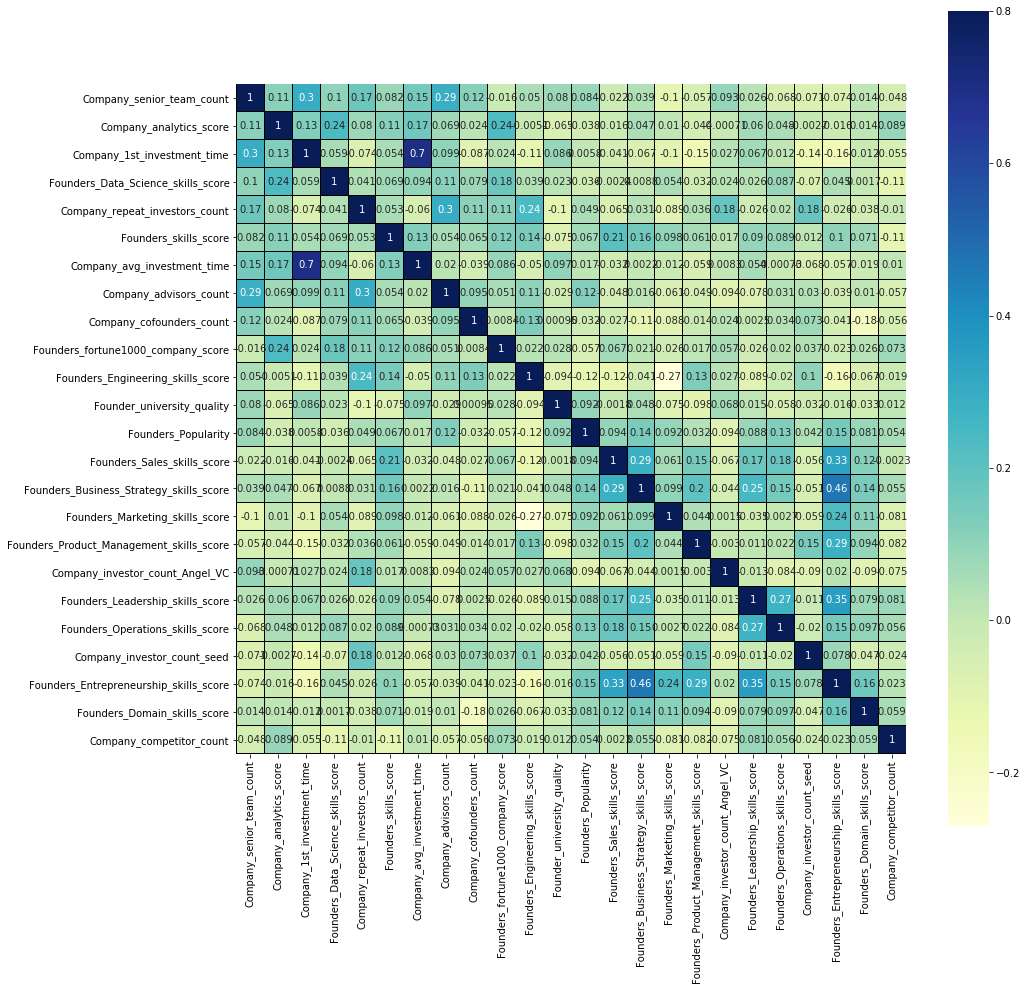

In [21]:
features = ['Company_senior_team_count','Company_analytics_score','Company_1st_investment_time','Founders_Data_Science_skills_score','Company_repeat_investors_count','Founders_skills_score','Company_avg_investment_time','Company_advisors_count','Company_cofounders_count','Founders_fortune1000_company_score','Founders_Engineering_skills_score','Founder_university_quality','Founders_Popularity','Founders_Sales_skills_score','Founders_Business_Strategy_skills_score','Founders_Marketing_skills_score','Founders_Product_Management_skills_score','Company_investor_count_Angel_VC','Founders_Leadership_skills_score','Founders_Operations_skills_score','Company_investor_count_seed','Founders_Entrepreneurship_skills_score','Founders_Domain_skills_score','Company_competitor_count']
plt.figure(figsize = (15,15))
sn.heatmap(combine_data[features].corr(), vmax=.8,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='black')
plt.show()

company_1st_investment_time, company_avg_investment_time,

## Preparing X and y using pandas

In [22]:
X = combine_data[features]
X.head()

,Company_senior_team_count,Company_analytics_score,Company_1st_investment_time,Founders_Data_Science_skills_score,Company_repeat_investors_count,Founders_skills_score,Company_avg_investment_time,Company_advisors_count,Company_cofounders_count,Founders_fortune1000_company_score,...,Founders_Business_Strategy_skills_score,Founders_Marketing_skills_score,Founders_Product_Management_skills_score,Company_investor_count_Angel_VC,Founders_Leadership_skills_score,Founders_Operations_skills_score,Company_investor_count_seed,Founders_Entrepreneurship_skills_score,Founders_Domain_skills_score,Company_competitor_count
0,4,2,10,8.823529,0,34.0,9.000000,0,2,0.0,...,21.764706,12.941176,10.882353,0,0.000,11.764706,5,15.882353,0.000000,0
1,7,1,2,3.846154,0,36.0,7.344444,0,3,0.2,...,17.094017,0.000000,9.401709,0,0.000,0.000000,15,9.401709,2.777778,0
2,8,0,13,0.000000,0,23.0,9.822222,1,1,0.0,...,0.000000,0.000000,0.000000,0,0.000,0.000000,7,0.000000,0.000000,0
3,4,0,12,3.125000,2,25.0,9.322222,0,4,0.0,...,6.250000,15.625000,3.125000,0,9.375,0.000000,2,6.250000,0.000000,0
4,4,2,20,0.000000,0,4.5,6.400000,4,3,0.0,...,0.000000,0.000000,0.000000,0,0.000,0.000000,0,0.000000,0.000000,0


In [23]:
y=combine_data.Dependent

## Splitting X and y into training and test datasets.

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

### Check the shape of X and y of train dataset.

In [25]:
print(X_train.shape)
print(y_train.shape)

(251, 24)
(251,)


### Check the shape of X and y of test dataset.

In [26]:
print(X_test.shape)
print(y_test.shape)

(63, 24)
(63,)


## Logistic regression in scikit-learn

In [27]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

C:\Users\nasa\Anaconda3\envs\Pandas\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Using the Model for Prediction

In [28]:
y_pred_train = logreg.predict(X_train)  

In [29]:
y_pred_test = logreg.predict(X_test) 

- We need an evaluation metric in order to compare our predictions with the actual values.

## Model evaluation 

__Error__ is the _deviation_ of the values _predicted_ by the model with the _true_ values.<br/>
We will use __accuracy score __ and __confusion matrix__ for evaluation.

### Model Evaluation using __accuracy classification score__

In [36]:
from sklearn.metrics import accuracy_score
print('Accuracy score for test data is:', accuracy_score(y_test,y_pred_test))

Accuracy score for test data is: 0.6666666666666666


### Model Evaluation using confusion matrix

A __confusion matrix__ is a __summary__ of prediction results on a classification problem.

The number of correct and incorrect predictions are summarized with count values and broken down by each class. <br/>
Below is a diagram showing a general confusion matrix.
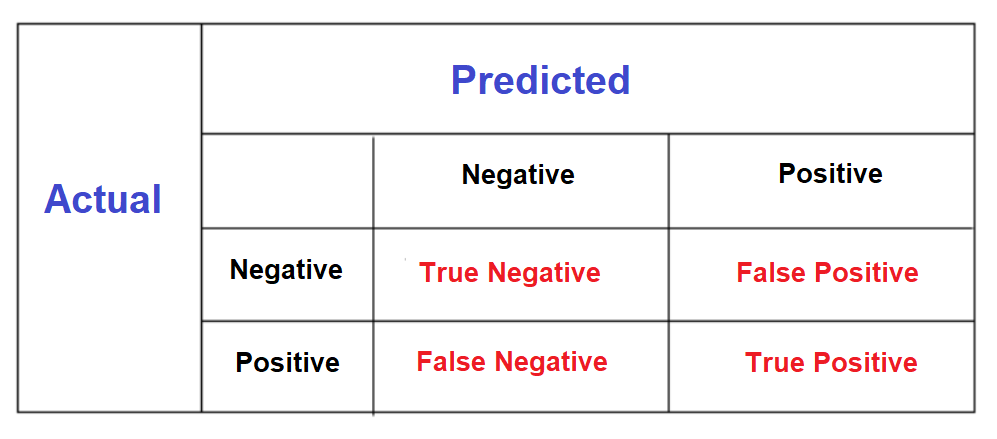

In [37]:
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test))

print(confusion_matrix)

    0  1
0  36  8
1  13  6


In [38]:
import numpy as np

In [39]:
preds1 = np.where(logreg.predict_proba(X_test)[:,1]> 0.75,1,0)
print('Accuracy score for test data is:', accuracy_score(y_test,preds1))

Accuracy score for test data is: 0.6825396825396826


In [40]:
preds2 = np.where(logreg.predict_proba(X_test)[:,1]> 0.25,1,0)
print('Accuracy score for test data is:', accuracy_score(y_test,preds2))

Accuracy score for test data is: 0.5714285714285714


### Submission of file

In [41]:
sample = pd.read_csv('E:/Insaid Project/aCQUIRE iNTERNSHIP/Sample_Submission_Format.csv')